In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [33]:
df = pd.read_excel('/content/ecom.xlsx')

In [34]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [36]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [37]:
df.select_dtypes(include='object').nunique()


,0
PreferredLoginDevice,3
PreferredPaymentMode,7
Gender,2
PreferedOrderCat,6
MaritalStatus,3


In [38]:
df.drop(columns=['CustomerID'],inplace=True)

In [39]:
df.isnull().sum()

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0
PreferedOrderCat,0


### EDA

In [40]:
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
            'PreferedOrderCat','MaritalStatus']
for i in cat_vars:
  print(i,df[i].unique())

PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
CityTier [3 1 2]
PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender ['Female' 'Male']
PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus ['Single' 'Divorced' 'Married']


- **We can see that phone is referred as mobile phone,phone ,mobile  - we need to make it one**
- **Also COD and Cash on Delivery are used as two different things**
- **Same with Credict Card and CC**

In [41]:
df.replace({'Mobile Phone':'Phone','Mobile':'Phone','Cash on Delivery' : 'COD','CC':'Credit Card'},inplace=True)

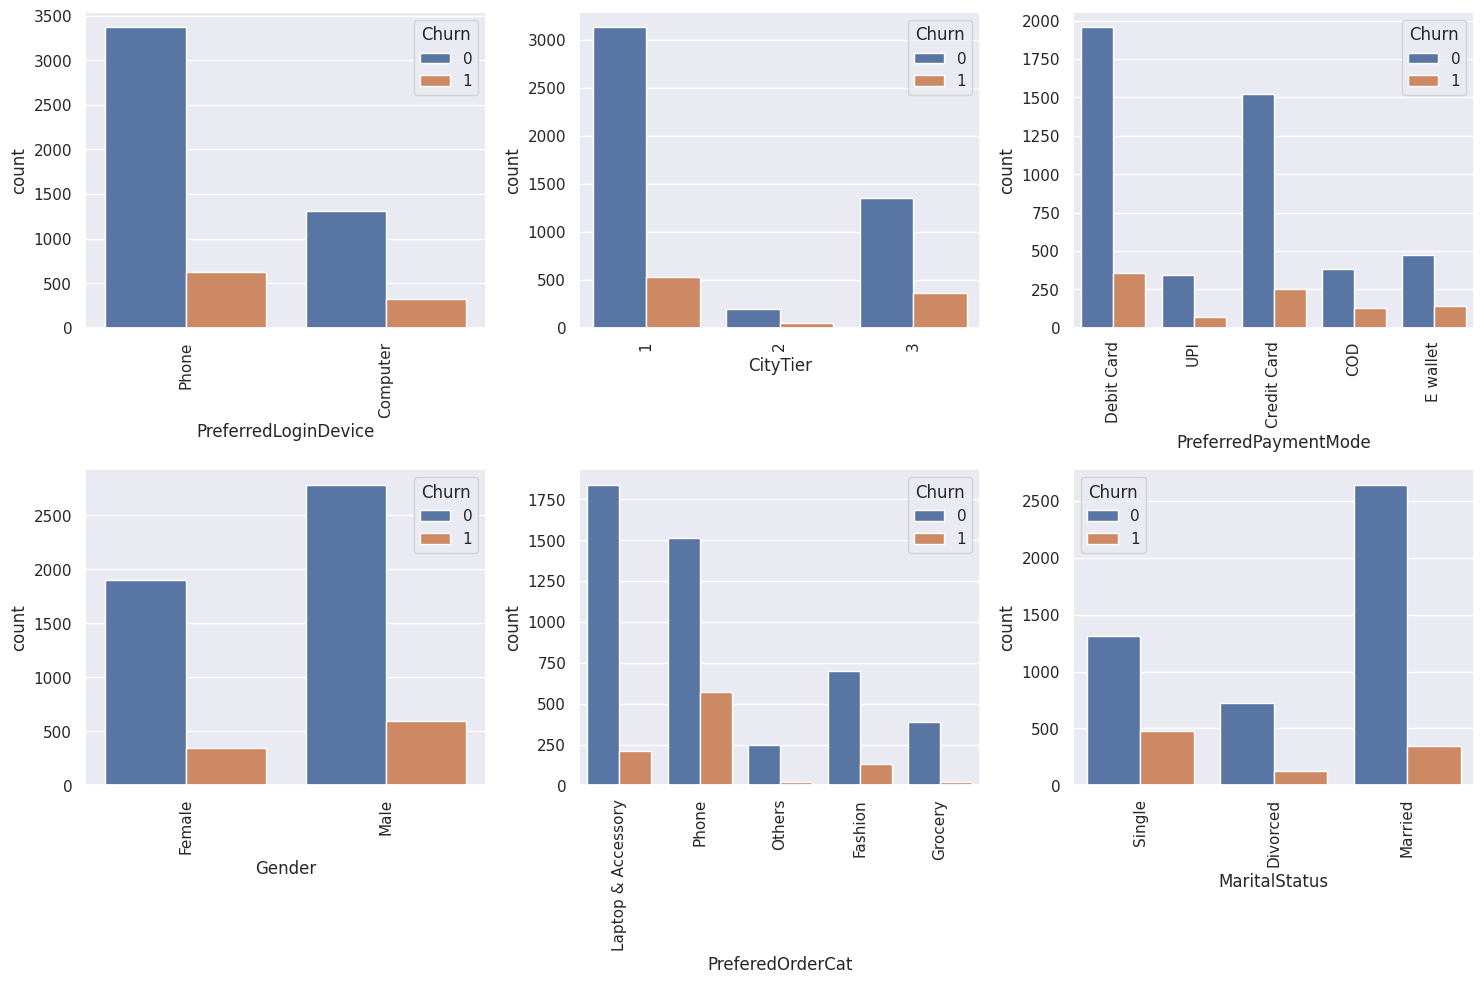

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axs = axs.flatten()

# countplots for each category
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn',data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()


### 1. PreferredLoginDevice
- Majority of customers prefer using **Phone** over **Computer** for accessing the platform.
- **Computer users show relatively higher churn proportion**, indicating potential dissatisfaction or lower engagement via desktop.

### 2. CityTier
- **Tier 1 cities dominate the customer base**, with lower churn proportions.
- **Tier 3 customers show a noticeably higher churn rate**, suggesting service or delivery issues in these regions.
- **Tier 2 cities have the smallest customer base**, with minimal churn impact overall.

### 3. PreferredPaymentMode
- **Debit Card and Credit Card** are the most popular payment methods.
- **COD (Cash on Delivery) users show the highest churn rate**, indicating possible trust or convenience issues.
- **UPI and E-wallet users have the lowest churn**, showing preference for digital, seamless transactions.

### 4. Gender
- The customer base is slightly skewed towards **Male users**.
- **Female customers exhibit a slightly higher churn proportion**, suggesting an opportunity for personalized retention strategies for this segment.

### 5. PreferedOrderCat (Preferred Order Category)
- **Laptop & Accessory and Phone** are the most preferred order categories.
- **Phone category buyers exhibit higher churn risk**, possibly due to one-time purchase behavior.
- **Grocery and Fashion customers show the least churn**, indicating these categories may have more frequent or repeat purchases.

### 6. MaritalStatus
- **Married customers make up the largest proportion of the customer base and churn the least**—possibly indicating stability or family-based shopping behavior.
- **Single customers show a higher churn rate**, suggesting less loyalty or irregular purchase patterns.
- **Divorced customers are a small group but show moderate churn risk**.



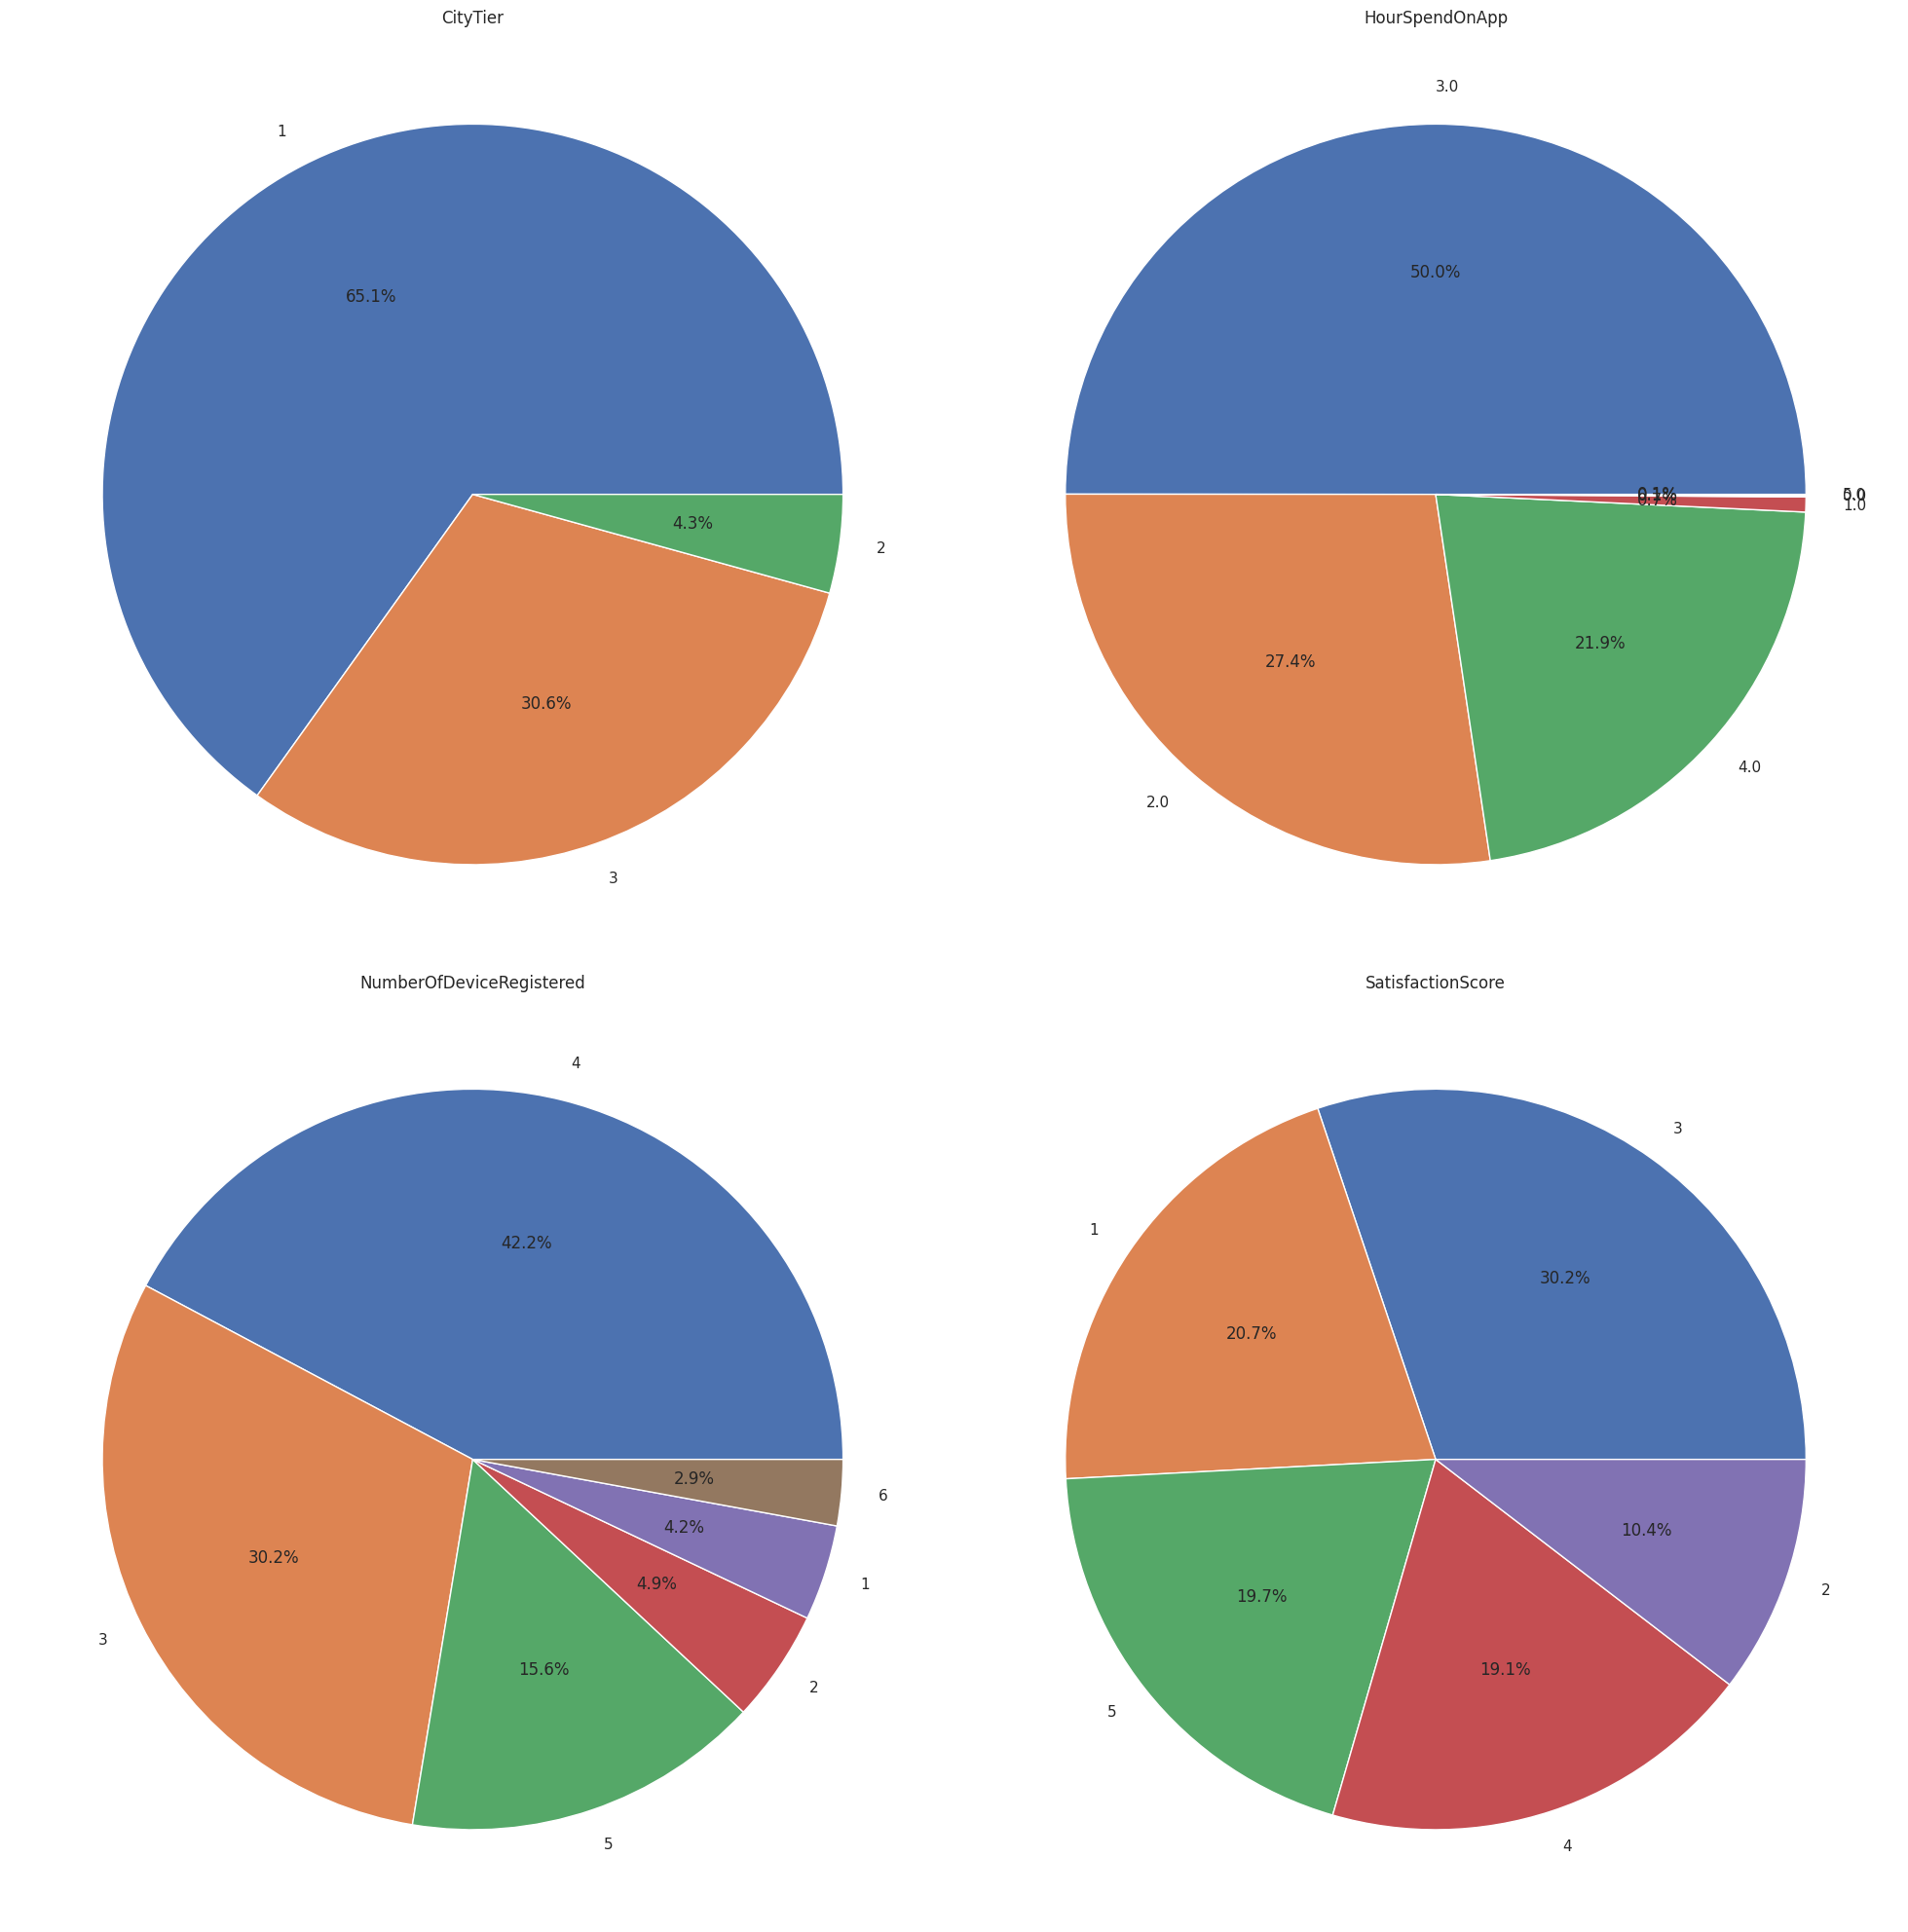

In [49]:
cat_num = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, var in enumerate(cat_num):
    ax=axs[i//2, i%2]
    ax.pie(df[var].value_counts(), labels=df[var].value_counts().index, autopct='%1.1f%%')
    ax.set_title(var)
plt.tight_layout()
plt.show()


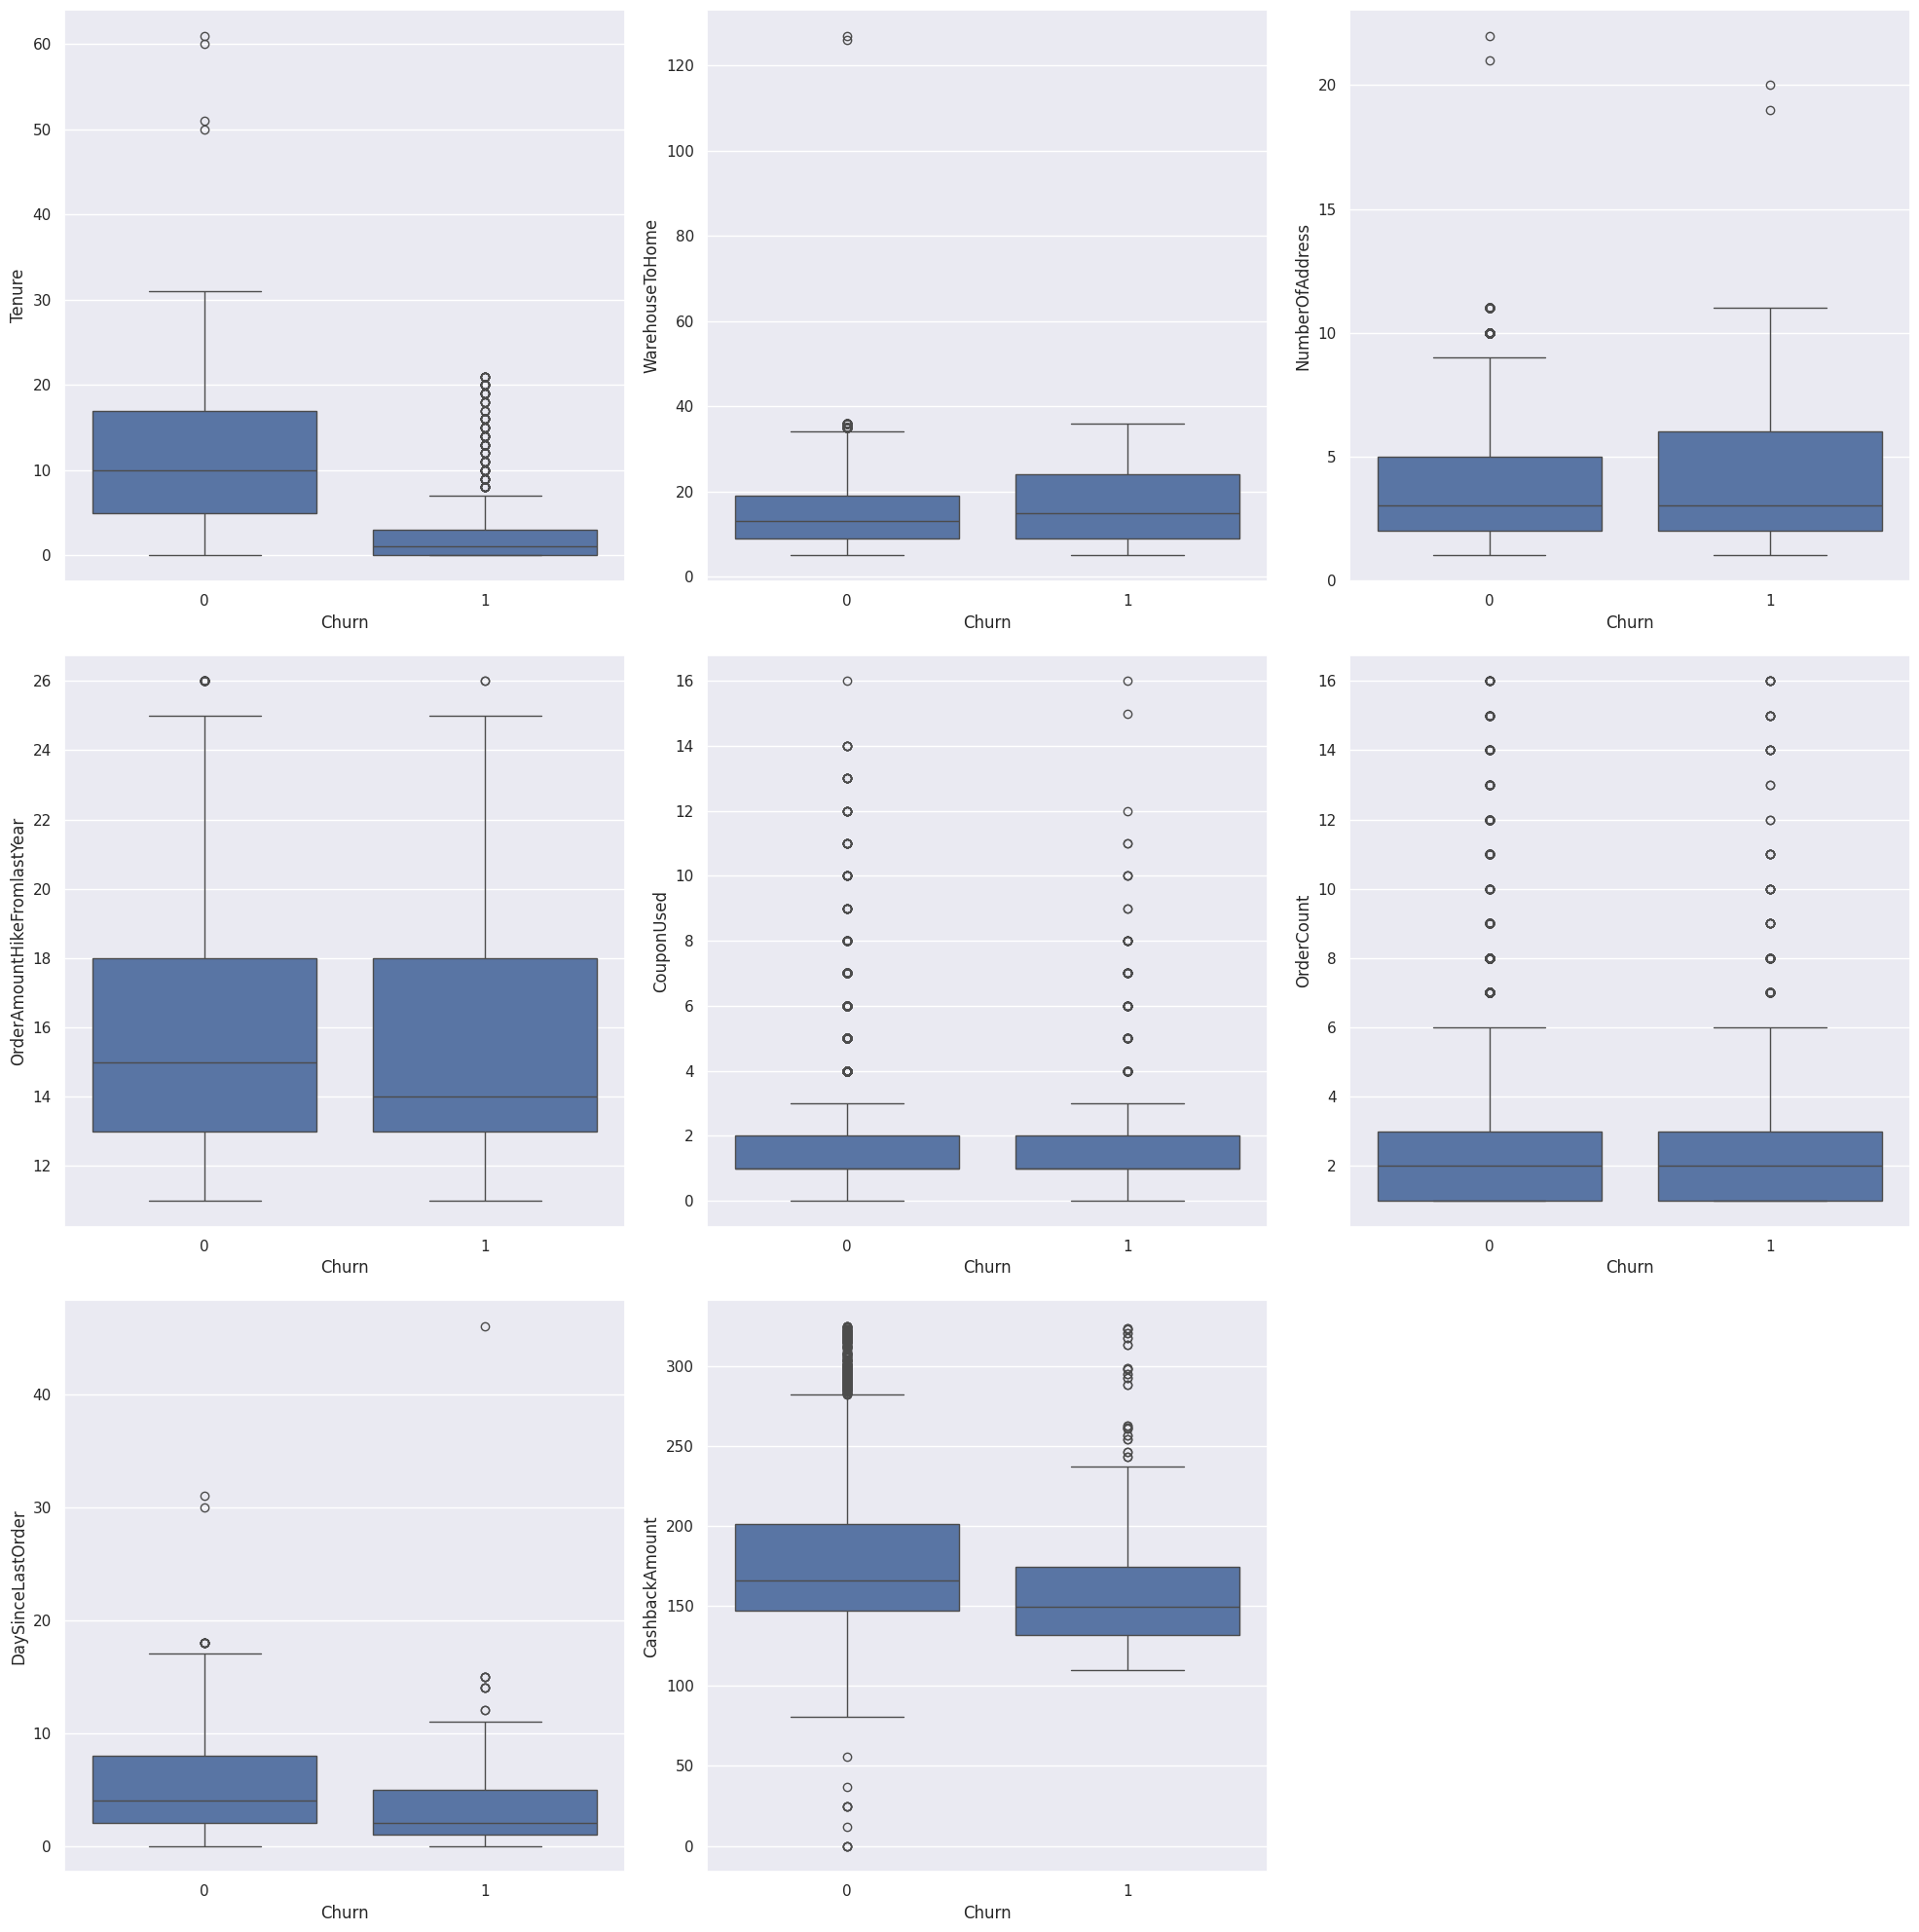

In [50]:
num_vars = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i])

fig.tight_layout()
fig.delaxes(axs[8])

plt.show()

- **from this boxpolot we can see that we need to cap the ouliers from `WarehouseToHome`, `CouponUsed`, `OrderCount`, `CashbackAmount`**
- **But the outliers from `tenure` maybe genuine as it shows customer loyalty**


# outlier removal
- Capping the values to 99th and 95th percentile according their outlier density

In [61]:
df['CashbackAmount'] = df['CashbackAmount'].clip(upper=df['CashbackAmount'].quantile(0.99), lower=df['CashbackAmount'].quantile(0.01))
df['WarehouseToHome'] = df['WarehouseToHome'].clip(upper=df['WarehouseToHome'].quantile(0.99))
df['CouponUsed'] = df['CouponUsed'].clip(upper=df['CouponUsed'].quantile(0.95))
df['OrderCount'] = df['OrderCount'].clip(upper=df['OrderCount'].quantile(0.95))
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].clip(upper=df['DaySinceLastOrder'].quantile(0.95))

# missing value imputation

In [63]:
df.isnull().sum()

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0
PreferedOrderCat,0


In [65]:
# to maintain central tendency of customer age/period we will fill na with median
df['Tenure'].fillna(df['Tenure'].median(),inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(),inplace=True)

In [66]:
# to maintain central tendency in cat-num column we will fill na with mode
df['CouponUsed'].fillna(df['CouponUsed'].mode()[0],inplace=True)
df['OrderCount'].fillna(df['OrderCount'].mode()[0],inplace=True)

In [67]:
# rest to be filled using knn imputer
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[['HourSpendOnApp', 'WarehouseToHome','DaySinceLastOrder']] = knn_imputer.fit_transform(df[['HourSpendOnApp', 'WarehouseToHome','DaySinceLastOrder']])

In [68]:
df.isnull().sum()

,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0


## removing duplicated rows

In [71]:
df[df.duplicated()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1347,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
1359,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
1395,1,11.0,Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
1456,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,160.74
1485,1,0.0,Phone,1,15.0,Credit Card,Female,2.0,3,Phone,5,Single,8,0,22.0,1.0,1.0,4.0,142.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,0,12.0,Phone,3,17.0,Debit Card,Female,4.0,4,Laptop & Accessory,1,Married,3,0,12.0,1.0,2.0,10.0,178.43
5613,0,10.0,Phone,3,18.0,E wallet,Female,4.0,5,Laptop & Accessory,1,Married,6,0,14.0,2.0,2.0,1.0,191.52
5620,0,3.0,Phone,1,35.0,Credit Card,Female,4.0,5,Phone,5,Single,3,0,15.0,1.0,2.0,5.0,162.85
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71


In [72]:
df.drop_duplicates(inplace=True,keep='first')

## Pandas Profiling for EDA

In [ ]:
!pip install ydata-profiling

In [74]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("EDA_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:00<00:00, 27.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
df.to_csv('ecom_v1.csv',index=False)